# CS 1656 – Introduction to Data Science (Fall 2019) 

## Instructor: Alexandros Labrinidis / Teaching Assistant: Xiaoting Li

## Term Project 

**Released: November 20, 2019**

**Due: December 10, 2019**

In [240]:
# Your name: Fangzheng Wu
# Your github ID: faw21
# Your pitt username: faw21

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikeviz.ipynb` that will:
* [Task 1] access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [241]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn import cluster

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [242]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

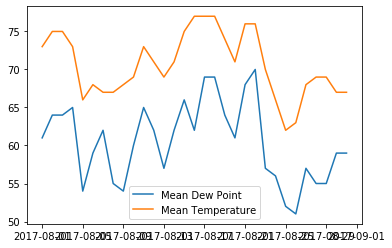

In [243]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('http://data.cs1656.org/KPIT_Aug17.csv',\
                       sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data.

### Task 1.1

In [244]:
q1 = pd.read_csv('HealthyRideRentals2019-Q1.csv', parse_dates=['Starttime', 'Stoptime'])
q2 = pd.read_csv('HealthyRideRentals2019-Q2.csv', parse_dates=['Starttime', 'Stoptime'])
q3 = pd.read_csv('HealthyRideRentals2019-Q3.csv', parse_dates=['Starttime', 'Stoptime'])

In [245]:
data = q1.append(q2, ignore_index = True)
data = data.append(q3, ignore_index = True)

In [246]:
data.sort_values(by = ['Bikeid', 'Trip id'], inplace = True)

In [247]:
CNT_info = {}

In [248]:
for series in data.itertuples():
    #calculate fromCNT
    if str(series[6])!='nan':
        stationid = int(series[6])
        time = re.findall('^\d{4}-\d{2}-\d{2}', str(series[2]))[0]
        station_date_pair = (stationid, time)
        if station_date_pair not in CNT_info:
            CNT_info[station_date_pair] = [0,0,0]
        
        fromCNT = CNT_info[station_date_pair][0]
        CNT_info[station_date_pair][0] = fromCNT + 1
     
    #calculate toCNT
    if str(series[8])!='nan':
        stationid = int(series[8])
        time = re.findall('^\d{4}-\d{2}-\d{2}', str(series[3]))[0]
        station_date_pair = (stationid, time)
        if station_date_pair not in CNT_info:
            CNT_info[station_date_pair] = [0,0,0]
        
        toCNT = CNT_info[station_date_pair][1]
        CNT_info[station_date_pair][1] = toCNT + 1

In [249]:
#calculate rebalCNT
for i in range(0,len(data)-1):
    if data.iloc[i]['Bikeid'] == data.iloc[i+1]['Bikeid']:
        if str(data.iloc[i+1]['From station id'])!='nan' and str(data.iloc[i]['To station id'])!='nan':
            if data.iloc[i]['To station id'] != data.iloc[i+1]['From station id']:
                stationid = int(data.iloc[i+1]['From station id'])
                time = re.findall('^\d{4}-\d{2}-\d{2}', str(data.iloc[i+1]['Starttime']))[0]
                station_date_pair = (stationid, time)
                rebalCNT = CNT_info[station_date_pair][2]
                CNT_info[station_date_pair][2] = rebalCNT + 1

In [250]:
table = []
for key, value in CNT_info.items():
    temp = (key[0], key[1], value[0], value[1], value[2])
    table.append(temp)

task_1_1 = pd.DataFrame(table, columns =['Station id', 'Date', 'fromCNT', 'toCNT', 'rebalCNT'])
task_1_1.sort_values(by=['Station id', 'Date'], inplace = True)
task_1_1.reset_index(inplace = True)
task_1_1.drop(['index'], axis=1, inplace = True)
task_1_1.head(20)
    

,Station id,Date,fromCNT,toCNT,rebalCNT
0,666,2019-07-20,1,0,1
1,666,2019-08-02,2,0,2
2,1000,2019-01-01,4,4,0
3,1000,2019-01-02,2,0,0
4,1000,2019-01-03,0,3,0
5,1000,2019-01-04,2,1,0
6,1000,2019-01-05,5,5,0
7,1000,2019-01-06,1,2,0
8,1000,2019-01-07,2,2,0
9,1000,2019-01-08,2,0,0


### Task 1.2

In [251]:
CNT_info = {}

In [252]:
for series in data.itertuples():
    #calculate fromCNT
    if str(series[6])!='nan':
        stationid = int(series[6])
        time = re.findall('^\d{4}-\d{2}', str(series[2]))[0]
        station_date_pair = (stationid, time)
        if station_date_pair not in CNT_info:
            CNT_info[station_date_pair] = [0,0,0]
        
        fromCNT = CNT_info[station_date_pair][0]
        CNT_info[station_date_pair][0] = fromCNT + 1
    
    #calculate toCNT
    if str(series[8])!='nan':
        stationid = int(series[8])
        time = re.findall('^\d{4}-\d{2}', str(series[3]))[0]
        station_date_pair = (stationid, time)
        if station_date_pair not in CNT_info:
            CNT_info[station_date_pair] = [0,0,0]
        
        toCNT = CNT_info[station_date_pair][1]
        CNT_info[station_date_pair][1] = toCNT + 1

In [253]:
#calculate rebalCNT
for i in range(0,len(data)-1):
    if data.iloc[i]['Bikeid'] == data.iloc[i+1]['Bikeid']:
        if str(data.iloc[i+1]['From station id'])!='nan' and str(data.iloc[i]['To station id'])!='nan':
            if data.iloc[i]['To station id'] != data.iloc[i+1]['From station id']:
                stationid = int(data.iloc[i+1]['From station id'])
                time = re.findall('^\d{4}-\d{2}', str(data.iloc[i+1]['Starttime']))[0]
                station_date_pair = (stationid, time)
                rebalCNT = CNT_info[station_date_pair][2]
                CNT_info[station_date_pair][2] = rebalCNT + 1

In [254]:
table = []
for key, value in CNT_info.items():
    temp = (key[0], key[1], value[0], value[1], value[2])
    table.append(temp)

task_1_2 = pd.DataFrame(table, columns =['Station id', 'Month', 'fromCNT', 'toCNT', 'rebalCNT'])
task_1_2.sort_values(by=['Station id', 'Month'], inplace = True)
task_1_2.reset_index(inplace = True)
task_1_2.drop(['index'], axis=1, inplace = True)
task_1_2.head(20)

,Station id,Month,fromCNT,toCNT,rebalCNT
0,666,2019-07,1,0,1
1,666,2019-08,2,0,2
2,1000,2019-01,35,43,1
3,1000,2019-02,51,58,11
4,1000,2019-03,132,174,11
5,1000,2019-04,392,426,7
6,1000,2019-05,601,659,29
7,1000,2019-06,666,722,11
8,1000,2019-07,672,692,27
9,1000,2019-08,586,640,15


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [255]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 4
filter_stationID = 1046

try:
    filter_month = int(input("Enter the month in numbers (default is 4): "))
except:
    print("input invalid, using default value 4")
    filter_month = 4
if filter_month < 1 or filter_month > 12:
    print("input invalid, using default value 4")
    filter_month = 4
    

try:
    filter_stationID = int(input("Enter the station id (default is 1046): "))
except:
    print("input invalid, using default value 1046")
    filter_stationID = 1046
if filter_stationID < 0:
    print("input invalid, using default value 1046")
    filter_stationID = 1046


Enter the month in numbers (default is 4): 
input invalid, using default value 4
Enter the station id (default is 1046): 
input invalid, using default value 1046


### Task 2.1

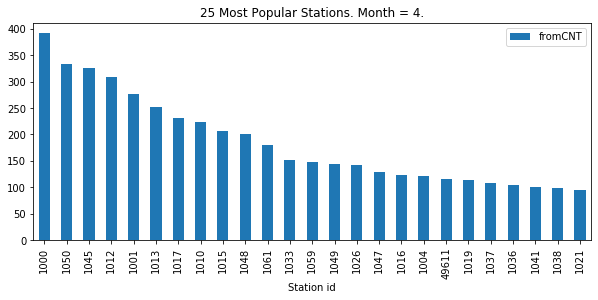

In [256]:
task_2_1 = task_1_2.sort_values(by=['fromCNT'], ascending=False)
table = []
counter = 0
for series in task_2_1.itertuples():
    month = int(series[2][-2:])
    if month == filter_month and counter < 25:
        tup = (series[1], series[3])
        table.append(tup)
        counter = counter + 1
        
task_2_1 = pd.DataFrame(table, columns =['Station id', 'fromCNT'])

task_2_1.plot.bar(x = 'Station id', y = 'fromCNT',figsize=(10,4))
plt.title('25 Most Popular Stations. Month = ' + str(filter_month) + '.')
plt.show()

### Task 2.2

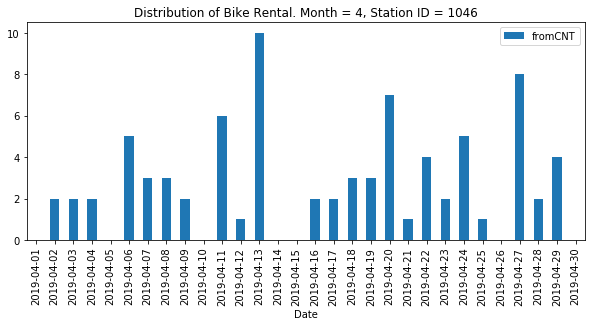

In [257]:
task_2_2 = task_1_1.sort_values(by=['Date'], ascending=True)
table = []
for series in task_2_2.itertuples():
    month = int(series[2][5:7])
    day = int(series[2][8:10])
    stationid = series[1]
    if month == filter_month and stationid == filter_stationID:
        tup = (series[2], series[3])
        table.append(tup)
        
        
task_2_2 = pd.DataFrame(table, columns =['Date', 'fromCNT'])

task_2_2.plot.bar(x = 'Date', y = 'fromCNT',figsize=(10,4))
plt.title('Distribution of Bike Rental. Month = ' + str(filter_month) + ', Station ID = ' + str(filter_stationID))
plt.show()

### Task 2.3

In [258]:
bikeRental = {}
for series in data.itertuples():
    time = re.findall('^\d{4}-\d{2}-\d{2}', str(series[2]))[0]
    month = int(time[5:7])
    if month == filter_month:
        if series[4] not in bikeRental:
            bikeRental[series[4]] = 0
        bikeRental[series[4]] = bikeRental[series[4]] + 1


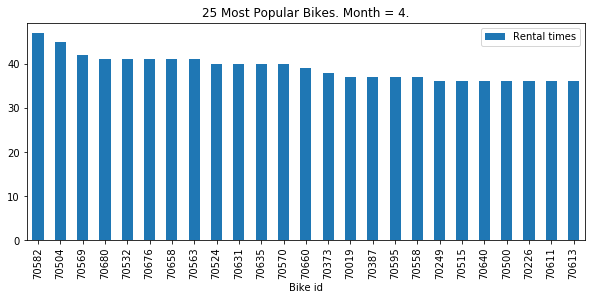

In [259]:
table = []
for bikeid, times in bikeRental.items():
    table.append((bikeid,times))
    
task_2_3 = pd.DataFrame(table, columns =['Bike id', 'Rental times'])
task_2_3.sort_values(by='Rental times', ascending=False, inplace = True)
task_2_3.iloc[:25].plot.bar(x = 'Bike id', y = 'Rental times',figsize=(10,4))

plt.title('25 Most Popular Bikes. Month = ' + str(filter_month) + '.')
plt.show()

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

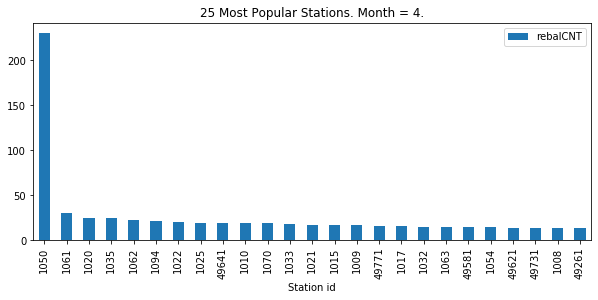

In [260]:
task_3_1 = task_1_2.sort_values(by=['rebalCNT'], ascending=False)
table = []
counter = 0
for series in task_3_1.itertuples():
    month = int(series[2][-2:])
    if month == filter_month and counter < 25:
        tup = (series[1], series[5])
        table.append(tup)
        counter = counter + 1
        
task_2_1 = pd.DataFrame(table, columns =['Station id', 'rebalCNT'])

task_2_1.plot.bar(x = 'Station id', y = 'rebalCNT',figsize=(10,4))
plt.title('25 Most Popular Stations. Month = ' + str(filter_month) + '.')
plt.show()

### Task 3.2

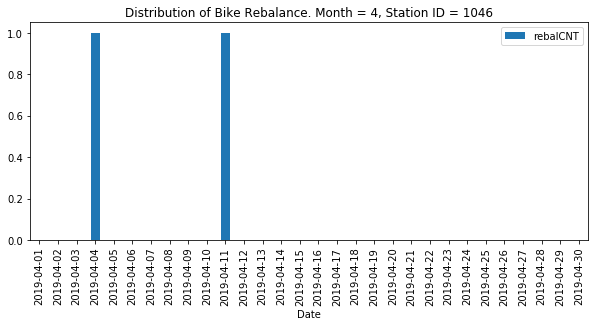

In [261]:
task_3_2 = task_1_1.sort_values(by=['Date'], ascending=True)
table = []
for series in task_3_2.itertuples():
    month = int(series[2][5:7])
    day = int(series[2][8:10])
    stationid = series[1]
    if month == filter_month and stationid == filter_stationID:
        tup = (series[2], series[5])
        table.append(tup)
        
        
task_2_2 = pd.DataFrame(table, columns =['Date', 'rebalCNT'])

task_2_2.plot.bar(x = 'Date', y = 'rebalCNT',figsize=(10,4))
plt.title('Distribution of Bike Rebalance. Month = ' + str(filter_month) + ', Station ID = ' + str(filter_stationID))
plt.show()

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

In [262]:
task_4 = task_1_2
dictionary = {}
table = []
for series in task_4.itertuples():
    month = int(series[2][-2:])
    if month == 7 or month == 8 or month == 9:
        station_id = series[1]
        if station_id not in dictionary:
            dictionary[station_id] = [0,0,0,0,0,0]
        
        if month == 7:
            dictionary[station_id][0] = series[3]
            dictionary[station_id][3] = series[5]
        if month == 8:
            dictionary[station_id][1] = series[3]
            dictionary[station_id][4] = series[5]
        if month == 9:
            dictionary[station_id][2] = series[3]
            dictionary[station_id][5] = series[5]
            

for key, value in dictionary.items():
    tup = (key, value[0], value[1], value[2], value[3], value[4], value[5])
    table.append(tup)
        
task_4 = pd.DataFrame(table, columns =['Station id', 'fromCNT_Jul', 'fromCNT_Aug', 'fromCNT_Sep',
                                         'rebalCNT_Jul', 'rebalCNT_Aug', 'rebalCNT_Sep'])

In [263]:
#generate three columns of data containing cluster id under three k_means situation
temp = task_4[['fromCNT_Jul', 'fromCNT_Aug','fromCNT_Sep', 'rebalCNT_Jul','rebalCNT_Aug', 'rebalCNT_Sep']]

k_means = cluster.KMeans(n_clusters=5, init='k-means++', random_state=5000)
k_means.fit(temp)
task_4['clusterID_kMeans_5'] = k_means.labels_


k_means = cluster.KMeans(n_clusters=10, init='k-means++', random_state=5000)
k_means.fit(temp)
task_4['clusterID_kMeans_10'] = k_means.labels_


k_means = cluster.KMeans(n_clusters=15, init='k-means++', random_state=5000)
k_means.fit(temp)
task_4['clusterID_kMeans_15'] = k_means.labels_

In [264]:
#generate three columns of data containing cluster id under three DBSCAN situation
dbscan = cluster.DBSCAN(eps=50, min_samples=3)
dbscan.fit(temp)
task_4['clusterID_dbscan_50_3'] = dbscan.labels_

dbscan = cluster.DBSCAN(eps=30, min_samples=5)
dbscan.fit(temp)
task_4['clusterID_dbscan_30_5'] = dbscan.labels_

dbscan = cluster.DBSCAN(eps=60, min_samples=2)
dbscan.fit(temp)
task_4['clusterID_dbscan_60_2'] = dbscan.labels_



### Task 4.2

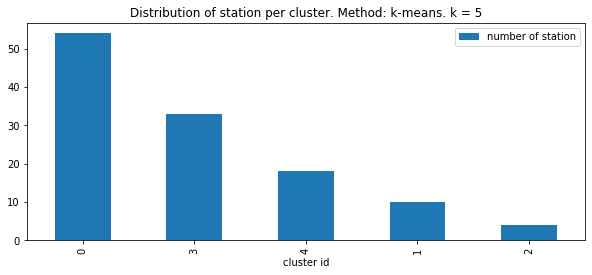

In [265]:
#k-means, k = 5
temp = task_4.groupby('clusterID_kMeans_5').count()
temp.sort_values(by='Station id', ascending = False, inplace = True)
ax = temp.plot.bar(y = 'Station id',figsize=(10,4))
plt.legend(['number of station'])
plt.title('Distribution of station per cluster. Method: k-means. k = 5')
plt.xlabel('cluster id')
plt.show()

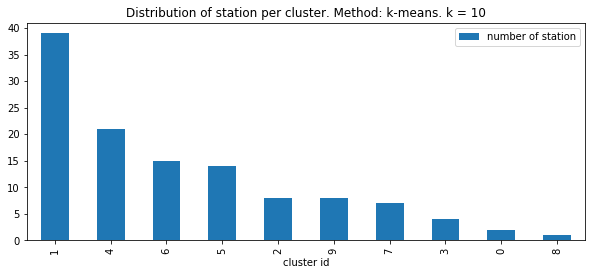

In [266]:
#k-means, k = 10
temp = task_4.groupby('clusterID_kMeans_10').count()
temp.sort_values(by='Station id', ascending = False, inplace = True)
ax = temp.plot.bar(y = 'Station id',figsize=(10,4))
plt.legend(['number of station'])
plt.title('Distribution of station per cluster. Method: k-means. k = 10')
plt.xlabel('cluster id')
plt.show()

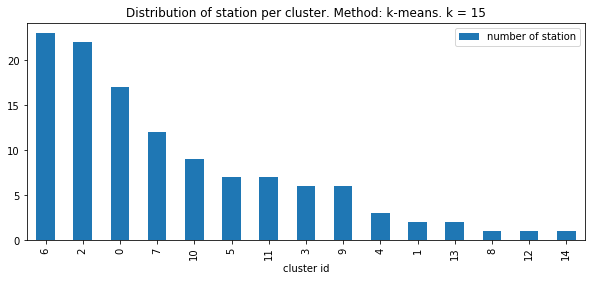

In [267]:
#k-means, k = 15
temp = task_4.groupby('clusterID_kMeans_15').count()
temp.sort_values(by='Station id', ascending = False, inplace = True)
ax = temp.plot.bar(y = 'Station id',figsize=(10,4))
plt.legend(['number of station'])
plt.title('Distribution of station per cluster. Method: k-means. k = 15')
plt.xlabel('cluster id')
plt.show()

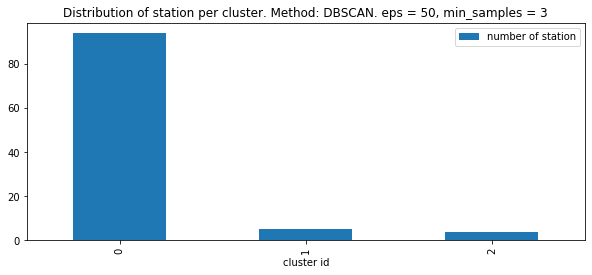

In [268]:
#DBSCAN, eps = 50, min_samples = 3

#
#I did not show the stations which belongs to no cluster (clusterID == -1)
#

temp = task_4.groupby('clusterID_dbscan_50_3').count()
temp.sort_values(by='Station id', ascending = False, inplace = True)

#drop the row whose cluster id == -1
temp.drop([-1], inplace = True)

temp.plot.bar(y = 'Station id',figsize=(10,4))
plt.legend(['number of station'])
plt.title('Distribution of station per cluster. Method: DBSCAN. eps = 50, min_samples = 3')
plt.xlabel('cluster id')
plt.show()

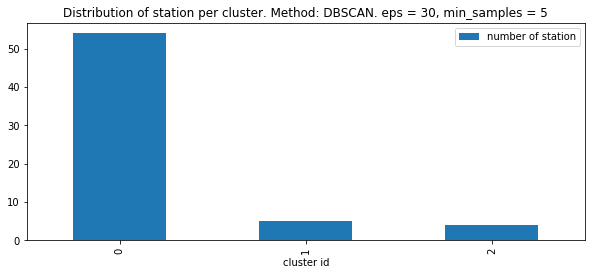

In [269]:
#DBSCAN, eps = 30, min_samples = 5

#
#I did not show the stations which belongs to no cluster (clusterID == -1)
#

temp = task_4.groupby('clusterID_dbscan_30_5').count()
temp.sort_values(by='Station id', ascending = False, inplace = True)

#drop the row whose cluster id == -1
temp.drop([-1], inplace = True)

temp.plot.bar(y = 'Station id',figsize=(10,4))
plt.legend(['number of station'])
plt.title('Distribution of station per cluster. Method: DBSCAN. eps = 30, min_samples = 5')
plt.xlabel('cluster id')
plt.show()

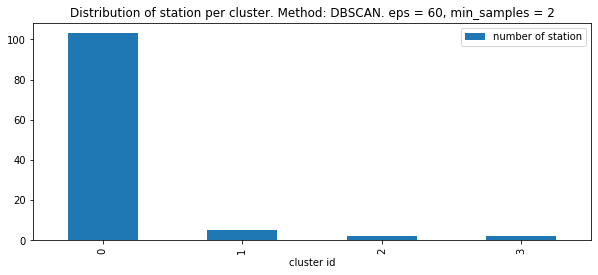

In [270]:
#DBSCAN, eps = 60, min_samples = 2

#
#I did not show the stations which belongs to no cluster (clusterID == -1)
#

temp = task_4.groupby('clusterID_dbscan_60_2').count()
temp.sort_values(by='Station id', ascending = False, inplace = True)

#drop the row whose cluster id == -1
temp.drop(index = [-1], inplace = True)

temp.plot.bar(y = 'Station id',figsize=(10,4))
plt.legend(['number of station'])
plt.title('Distribution of station per cluster. Method: DBSCAN. eps = 60, min_samples = 2')
plt.xlabel('cluster id')
plt.show()

### Task 4.3

1. K-Means: Basically, I used elbow method to determine the optimal k for the k-means clustering. The idea is to calculate 'the sum of squared distances of samples to the nearest cluster centre'. Ideally, as the k increases, the sum of squared distances will tend to zero. If we plot the relationship between k and sum of squared distances, the shape of curve will look like an arm, and the value of k on the elbow of the arm will be the optimal k, because k is relatively small (which divides the data into larger chunks) and sum of squared distance is reasonably small as well (which means the subject in the group is closer to the centers of clusters). I implement an algorithm to find out the optimal k in the range from 2 to 20 (see below). From the graph, we can see that k=4 is the elbow of the arm, so the optimal value of k is 4. In task 4.2, i pick 5, 10, and 15 as the value of k. Thus, among my choices of k, the optimal value should be 5 since it is closest to 4.

2. Between k-means and DBSCAN, I prefer the k-means. From the graphs of Task 4.2, we can see that the DBSCAN usually produces a large cluster along with a few tiny clusters, which may be unuseful for data analysis, because those tiny clusters are not representative. K-means, on the other hand, produces clusters with similar volume.

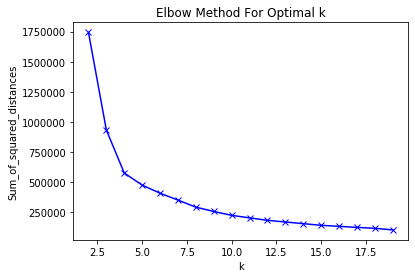

In [271]:
##########
#Elbow method to find optimal k
##########


temp = task_4[['fromCNT_Jul', 'fromCNT_Aug','fromCNT_Sep', 'rebalCNT_Jul','rebalCNT_Aug', 'rebalCNT_Sep']]
Sum_of_squared_distances = []

for i in range (2,20):
    k_means = cluster.KMeans(n_clusters=i, init='k-means++', random_state=5000)
    k_means.fit(temp)
    Sum_of_squared_distances.append(k_means.inertia_)

plt.plot((range (2,20)), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()